# Data Collection

## Data

**Star Trek Series**

| Series | Seasons | Episodes | Originally released | In Dataset |
| :----: | :----: | :----: | :----: | :----: |
| The Original Series | 3 | 79 | September 8, 1966 – June 3, 1969 | yes |
| The Animated Series | 2 | 22 | September 8, 1973 – October 12, 1974 | yes |
| The Next Generation | 7 | 178 | September 28, 1987 – May 23, 1994 | yes |
| Deep Space Nine | 7 | 176 | January 4, 1993 – May 31, 1999 | yes |
| Voyager | 7 | 172 | January 16, 1995 – May 23, 2001 | yes |
| Enterprise | 4 | 98 | September 26, 2001 – May 13, 2005 | yes |
| Discovery | 3 | 42 | September 24, 2017 – present | only 1st season |
| Short Treks | 2 | 10 | October 4, 2018 – January 9, 2020 | no |
| Picard | 1 | 10 | January 23, 2020 – present | no |
| Lower Decks | 1 | 10 | August 6, 2020 – present | no |

Source: [Wikipedia:StarTrek#Television](https://en.wikipedia.org/wiki/Star_Trek#Television)

## List of Episodes with Transcripts

* List of all episodes in each series
* Transcripts for all episodes

Source: [www.chakoteya.net | The Star Trek Transcripts](http://www.chakoteya.net/StarTrek/index.html)

## Metadata

* Release or production year


## Data structure for corpus:

| id | airdate | series | production_number | episode_title | script |
| :----: | :----: | :----: | :----: | :----: | :----: |
| id | airdate | series | production_number | episode_title | script |
| id | airdate | series | production_number | episode_title | script |

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Create list of links to each series' episode list page
episodes_list_links = ["http://www.chakoteya.net/StarTrek/episodes.htm",
               "http://www.chakoteya.net/NextGen/episodes.htm",
               "http://www.chakoteya.net/DS9/episodes.htm",
               "http://www.chakoteya.net/Voyager/episode_listing.htm",
               "http://www.chakoteya.net/Enterprise/episodes.htm",
               "http://www.chakoteya.net/STDisco17/episodes.html"]

In [5]:
# Create list of base links for each series as root for single episodes
base_links = []

for link in episodes_list_links:
    base_links.append(link.rsplit('/',1)[0] + "/")

In [6]:
links_to_remove = ['http://www.chakoteya.net/StarTrek/None',
                   'fortyseven.htm',
                   'http://www.chakoteya.net/Voyager/LineCountS1-S3.htm',
                   'LineCountS1-S3.htm',
                   'http://www.chakoteya.net/Voyager/LineCountS4-S7.htm',
                   'LineCountS4-S7.htm',
                   'http://www.cbs.com',
                   '../StarTrek/index.html',
                   'http://www.cbs.com',
                   'http://www.chakoteya.net/section31.php',
                  'http://www.chakoteya.net/projecthoneypot_script/section31.php']

In [7]:
episodes_list = []

for i, link in enumerate(episodes_list_links):
    website_url = requests.get(link).text
    soup = BeautifulSoup(website_url, 'lxml')
    urls = soup.find_all('a', href=True)
    for page in urls:
        if page.get('href') not in links_to_remove:
            series = link.split('/')[3]
            episode_title = page.text
            production_number = page['href'].split('.')[0]
            script_link = base_links[i] + str(page.get('href'))
            episodes_list.append([series, production_number,
                                  episode_title, script_link])
        else:pass
    
    print("Series {} done.".format(link.split('/')[3]))

    #print(f"There are {nb_links} links in this page")


Series StarTrek done.
Series NextGen done.
Series DS9 done.
Series Voyager done.
Series Enterprise done.
Series STDisco17 done.


In [8]:
episodes_df = pd.DataFrame(episodes_list, 
                        columns = ['series', 'production_number',
                                   'episode_title', 'script_link'])

In [9]:
episodes_df.head()

,series,production_number,episode_title,script_link
0,StarTrek,1,The Cage,http://www.chakoteya.net/StarTrek/1.htm
1,StarTrek,6,The Man Trap,http://www.chakoteya.net/StarTrek/6.htm
2,StarTrek,8,Charlie X,http://www.chakoteya.net/StarTrek/8.htm
3,StarTrek,2,Where No Man Has Gone Before,http://www.chakoteya.net/StarTrek/2.htm
4,StarTrek,7,The Naked Time,http://www.chakoteya.net/StarTrek/7.htm


In [10]:
episodes_df.tail()

,series,production_number,episode_title,script_link
723,STDisco17,111,The Wolf Inside,http://www.chakoteya.net/STDisco17/111.html
724,STDisco17,112,Vaulting Ambition,http://www.chakoteya.net/STDisco17/112.html
725,STDisco17,113,What's Past is Prologue,http://www.chakoteya.net/STDisco17/113.html
726,STDisco17,114,"The War Without, The War Within",http://www.chakoteya.net/STDisco17/114.html
727,STDisco17,115,Will You Take My Hand?,http://www.chakoteya.net/STDisco17/115.html


In [11]:
episodes_df.describe(include='all')

,series,production_number,episode_title,script_link
count,728,728,728,728
unique,6,549,728,728
top,NextGen,525,Ménage à Troi,http://www.chakoteya.net/DS9/501.htm
freq,176,3,1,1


In [12]:
print("Number of episodes in total: ", episodes_df['episode_title'].nunique())

Number of episodes in total:  728


In [13]:
print("Number of series in Dataset: ", episodes_df['series'].nunique())

Number of series in Dataset:  6


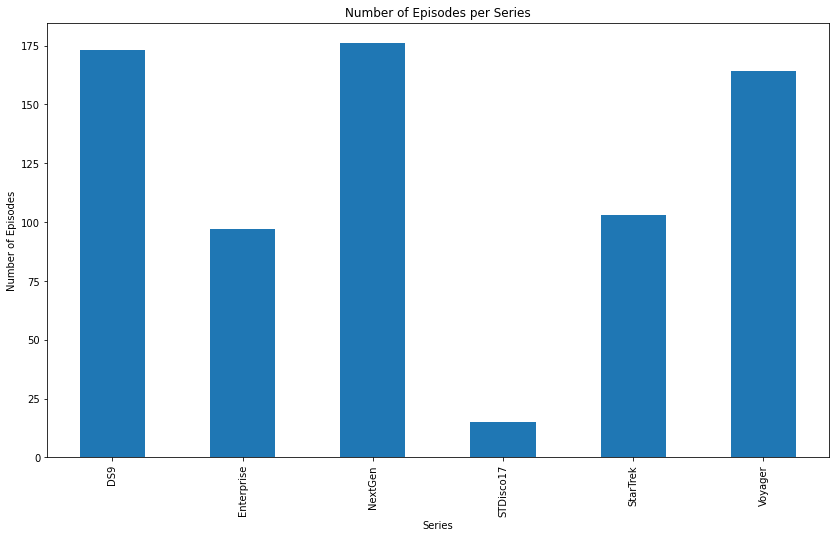

In [14]:
ax = episodes_df['series'].value_counts().sort_index().plot(kind='bar',
                                         figsize=(14,8))
plt.xlabel('Series')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes per Series')
plt.show()

In [15]:
episodes_df[episodes_df.duplicated(['production_number'])]

,series,production_number,episode_title,script_link
452,Voyager,101,Caretaker,http://www.chakoteya.net/Voyager/101.htm
454,Voyager,103,Time and Again,http://www.chakoteya.net/Voyager/103.htm
455,Voyager,104,Phage,http://www.chakoteya.net/Voyager/104.htm
456,Voyager,105,The Cloud,http://www.chakoteya.net/Voyager/105.htm
457,Voyager,106,Eye of the Needle,http://www.chakoteya.net/Voyager/106.htm
...,...,...,...,...
723,STDisco17,111,The Wolf Inside,http://www.chakoteya.net/STDisco17/111.html
724,STDisco17,112,Vaulting Ambition,http://www.chakoteya.net/STDisco17/112.html
725,STDisco17,113,What's Past is Prologue,http://www.chakoteya.net/STDisco17/113.html
726,STDisco17,114,"The War Without, The War Within",http://www.chakoteya.net/STDisco17/114.html


In [16]:
episodes_df.head()

,series,production_number,episode_title,script_link
0,StarTrek,1,The Cage,http://www.chakoteya.net/StarTrek/1.htm
1,StarTrek,6,The Man Trap,http://www.chakoteya.net/StarTrek/6.htm
2,StarTrek,8,Charlie X,http://www.chakoteya.net/StarTrek/8.htm
3,StarTrek,2,Where No Man Has Gone Before,http://www.chakoteya.net/StarTrek/2.htm
4,StarTrek,7,The Naked Time,http://www.chakoteya.net/StarTrek/7.htm


In [26]:
script_list = []

for row in episodes_df['script_link']:
    response = requests.get(row)
    content = response.content
    parser = BeautifulSoup(content, 'html.parser')
    text = parser.text
    script_list.append(text)

In [27]:
len(script_list)

728

In [30]:
episodes_df['script'] = script_list

In [34]:
episodes_df.head()

,series,production_number,episode_title,script_link,script
0,StarTrek,1,The Cage,http://www.chakoteya.net/StarTrek/1.htm,\n\n\n\n\n\nThe Star Trek Transcripts - The Ca...
1,StarTrek,6,The Man Trap,http://www.chakoteya.net/StarTrek/6.htm,\n\n\n\n\n\nThe Star Trek Transcripts - The Ma...
2,StarTrek,8,Charlie X,http://www.chakoteya.net/StarTrek/8.htm,\n\n\n\n\n\nThe Star Trek Transcripts - Charli...
3,StarTrek,2,Where No Man Has Gone Before,http://www.chakoteya.net/StarTrek/2.htm,\n\n\n\n\n\nThe Star Trek Transcripts - Where ...
4,StarTrek,7,The Naked Time,http://www.chakoteya.net/StarTrek/7.htm,\n\n\n\n\n\nThe Star Trek Transcripts - The Na...


In [35]:
episodes_df.to_csv('../data/interim_data/star_trek_episodes_scripts.csv')